# Let's-a-go!: Analyzing Nintendo Sales on Top Selling Consoles

## Data Scraped and compiled from the Following Wikipedia Pages:

List of Best Selling Nintendo DS Video Games

List of Best Selling Wii Video Games

List of Best Selling Game Boy Video Games

List of Best Selling Video Games

# Background

Since 1983, Nintendo has had substantial market share of video game consoles and software. Introducing popular characters and titles like Mario and Pokemon to millions of people, Nintendo has dominated competition of Sony and Microsoft.

### As of FY 2023, Nintendo reported their highest grossing console sales as the following:

DS:              154 million units

Gameboy:         119 million units

Switch:          114 million units

Wii:             102 million units

#### However, it is thrilling to see how Nintendo intends to plan its future with more of its beloved content.

#### Here we go! This analysis will dive into the sales of games for Nintendo's most popular consoles above. 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import re
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

# Nintendo DS

In [206]:
ds_url = "https://en.wikipedia.org/wiki/List_of_best-selling_Nintendo_DS_video_games"
ds_wiki = pd.read_html(ds_url)[1]
ds_wiki

,No.,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,1,New Super Mario Bros.,30.80 million[3],"May 15, 2006",Platform,Nintendo EAD (Group 4),Nintendo
1,2,Nintendogs (all versions),23.96 million[3],"April 21, 2005",Pet-raising simulation,Nintendo EAD (Group 1),Nintendo
2,3,Mario Kart DS,23.60 million[3],"November 14, 2005",Racing,Nintendo EAD (Group 1),Nintendo
3,4,Brain Age: Train Your Brain in Minutes a Day!,19.01 million[3],"May 19, 2005",Puzzle,Nintendo SPD,Nintendo
4,5,Pokémon Diamond and Pearl,17.67 million[3],"September 28, 2006",Role-playing,Game Freak,The Pokémon CompanyNintendo
...,...,...,...,...,...,...,...
68,69,Metroid Prime Hunters,1.08 million[5],"June 1, 2006",First-personaction-adventure,Nintendo Software Technology,Nintendo
69,70,Final Fantasy XII: Revenant Wings,1.04 million[m],"April 26, 2007",Tactical role-playing,Square Enix,Square Enix
70,71,Drawn to Life,1 million[27],"September 10, 2007",Action-adventureplatform,5th Cell,THQ
71,71,Scribblenauts,1 million[28],"September 15, 2009",Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment


In [3]:
nintendo_ds = ds_wiki

In [4]:
del nintendo_ds['No.']

In [5]:
nintendo_ds.dtypes

Game               object
Copies sold        object
Release date[a]    object
Genre(s)           object
Developer(s)       object
Publisher(s)       object
dtype: object

In [6]:
for column in nintendo_ds.columns:
    nintendo_ds[column] = nintendo_ds[column].str.replace(r"\(.*\)", " ")
    nintendo_ds[column] = nintendo_ds[column].str.replace(r"\[.*\]", " ")
    nintendo_ds[column] = nintendo_ds[column].str.replace(r"million", " ")

C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/2281697681.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_ds[column] = nintendo_ds[column].str.replace(r"\(.*\)", " ")
C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/2281697681.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_ds[column] = nintendo_ds[column].str.replace(r"\[.*\]", " ")


In [7]:
nintendo_ds

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,New Super Mario Bros.,30.80,"May 15, 2006",Platform,Nintendo EAD,Nintendo
1,Nintendogs,23.96,"April 21, 2005",Pet-raising simulation,Nintendo EAD,Nintendo
2,Mario Kart DS,23.60,"November 14, 2005",Racing,Nintendo EAD,Nintendo
3,Brain Age: Train Your Brain in Minutes a Day!,19.01,"May 19, 2005",Puzzle,Nintendo SPD,Nintendo
4,Pokémon Diamond and Pearl,17.67,"September 28, 2006",Role-playing,Game Freak,The Pokémon CompanyNintendo
...,...,...,...,...,...,...
68,Metroid Prime Hunters,1.08,"June 1, 2006",First-personaction-adventure,Nintendo Software Technology,Nintendo
69,Final Fantasy XII: Revenant Wings,1.04,"April 26, 2007",Tactical role-playing,Square Enix,Square Enix
70,Drawn to Life,1,"September 10, 2007",Action-adventureplatform,5th Cell,THQ
71,Scribblenauts,1,"September 15, 2009",Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment


In [8]:
nintendo_ds.rename(columns= {'Release date[a]': 'Release_date',
                             'Genre(s)':        'Genre',
                             'Developer(s)':    'Developer',
                             'Publisher(s)':    'Publisher',
                             'Copies sold':     'Copies_sold_millions'}, inplace=True)
nintendo_ds

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,New Super Mario Bros.,30.80,"May 15, 2006",Platform,Nintendo EAD,Nintendo
1,Nintendogs,23.96,"April 21, 2005",Pet-raising simulation,Nintendo EAD,Nintendo
2,Mario Kart DS,23.60,"November 14, 2005",Racing,Nintendo EAD,Nintendo
3,Brain Age: Train Your Brain in Minutes a Day!,19.01,"May 19, 2005",Puzzle,Nintendo SPD,Nintendo
4,Pokémon Diamond and Pearl,17.67,"September 28, 2006",Role-playing,Game Freak,The Pokémon CompanyNintendo
...,...,...,...,...,...,...
68,Metroid Prime Hunters,1.08,"June 1, 2006",First-personaction-adventure,Nintendo Software Technology,Nintendo
69,Final Fantasy XII: Revenant Wings,1.04,"April 26, 2007",Tactical role-playing,Square Enix,Square Enix
70,Drawn to Life,1,"September 10, 2007",Action-adventureplatform,5th Cell,THQ
71,Scribblenauts,1,"September 15, 2009",Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment


In [9]:
nintendo_ds['Copies_sold_millions'] = nintendo_ds['Copies_sold_millions'].astype(float)

In [10]:
nintendo_ds

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,New Super Mario Bros.,30.80,"May 15, 2006",Platform,Nintendo EAD,Nintendo
1,Nintendogs,23.96,"April 21, 2005",Pet-raising simulation,Nintendo EAD,Nintendo
2,Mario Kart DS,23.60,"November 14, 2005",Racing,Nintendo EAD,Nintendo
3,Brain Age: Train Your Brain in Minutes a Day!,19.01,"May 19, 2005",Puzzle,Nintendo SPD,Nintendo
4,Pokémon Diamond and Pearl,17.67,"September 28, 2006",Role-playing,Game Freak,The Pokémon CompanyNintendo
...,...,...,...,...,...,...
68,Metroid Prime Hunters,1.08,"June 1, 2006",First-personaction-adventure,Nintendo Software Technology,Nintendo
69,Final Fantasy XII: Revenant Wings,1.04,"April 26, 2007",Tactical role-playing,Square Enix,Square Enix
70,Drawn to Life,1.00,"September 10, 2007",Action-adventureplatform,5th Cell,THQ
71,Scribblenauts,1.00,"September 15, 2009",Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment


In [11]:
nintendo_ds.dtypes

Game                     object
Copies_sold_millions    float64
Release_date             object
Genre                    object
Developer                object
Publisher                object
dtype: object

In [12]:
nintendo_ds['Release_date'] = [str(datetime.datetime.strptime(i, '%B %d, %Y').date()) for i in nintendo_ds['Release_date']]

In [13]:
nintendo_ds

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,New Super Mario Bros.,30.80,2006-05-15,Platform,Nintendo EAD,Nintendo
1,Nintendogs,23.96,2005-04-21,Pet-raising simulation,Nintendo EAD,Nintendo
2,Mario Kart DS,23.60,2005-11-14,Racing,Nintendo EAD,Nintendo
3,Brain Age: Train Your Brain in Minutes a Day!,19.01,2005-05-19,Puzzle,Nintendo SPD,Nintendo
4,Pokémon Diamond and Pearl,17.67,2006-09-28,Role-playing,Game Freak,The Pokémon CompanyNintendo
...,...,...,...,...,...,...
68,Metroid Prime Hunters,1.08,2006-06-01,First-personaction-adventure,Nintendo Software Technology,Nintendo
69,Final Fantasy XII: Revenant Wings,1.04,2007-04-26,Tactical role-playing,Square Enix,Square Enix
70,Drawn to Life,1.00,2007-09-10,Action-adventureplatform,5th Cell,THQ
71,Scribblenauts,1.00,2009-09-15,Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment


In [14]:
nintendo_ds.to_csv('nintendo_ds_game_data.csv', index=False)

In [15]:
nintendo_ds_csv = pd.read_csv('nintendo_ds_game_data.csv')

In [16]:
Path('nintendo_ds_data.db').touch()
ds_conn = sqlite3.connect('nintendo_ds_data.db')
ds_cursor = ds_conn.cursor()

In [17]:
nintendo_ds.to_sql('nintendo_ds', ds_conn, if_exists='replace', index=False)

In [18]:
# ds_cursor.execute('''CREATE TABLE nintendo_ds_table (Game text, Copies_sold_millions real, Release_date real, Genre text, Developer text, Publisher text)''')

In [19]:
# nintendo_ds_csv.to_sql('nintendo_ds_table', ds_conn, if_exists='replace', index=False)

In [20]:
# nintendo_ds_csv.dtypes

In [118]:
ds_games_sold_query = pd.read_sql('''SELECT Game, Copies_sold_millions FROM nintendo_ds
ORDER BY Copies_sold_millions DESC LIMIT 10''', ds_conn)
ds_games_sold_query.describe()

,Copies_sold_millions
count,10.000000
mean,18.109000
std,6.343328
min,11.060000
25%,13.260000
50%,16.655000
75%,22.452500
max,30.800000


In [21]:
mario_query = pd.read_sql('''SELECT Game, Copies_sold_millions, Release_date FROM nintendo_ds
WHERE Game LIKE '%Mario%'
ORDER BY Copies_sold_millions DESC ''', ds_conn)
mario_query

,Game,Copies_sold_millions,Release_date
0,New Super Mario Bros.,30.80,2006-05-15
1,Mario Kart DS,23.60,2005-11-14
2,Super Mario 64 DS,11.06,2004-11-21
3,Mario Party DS,9.31,2007-11-08
4,Mario & Luigi: Bowser's Inside Story,4.56,2009-02-11
5,Mario & Sonic at the Olympic Games,4.22,2008-01-17
6,Mario vs. Donkey Kong: Mini-Land Mayhem!,2.98,2010-11-14
7,Mario Hoops 3-on-3,2.03,2006-07-27
8,Mario & Luigi: Partners in Time,1.73,2005-11-28
9,Mario vs. Donkey Kong 2: March of the Minis,1.52,2006-09-25


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


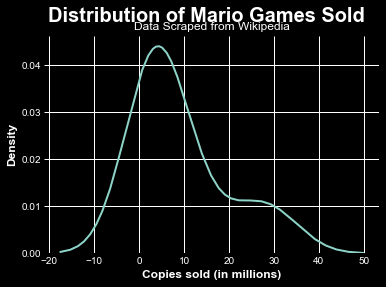

In [43]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Mario Games Sold', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
sns.distplot(mario_query['Copies_sold_millions'], kde=True, hist=False)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Density', weight ='bold', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()
# plt.grid()

In [49]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [107]:
mario_query['Copies_sold_millions'].describe()

count    10.000000
mean      9.181000
std      10.157639
min       1.520000
25%       2.267500
50%       4.390000
75%      10.622500
max      30.800000
Name: Copies_sold_millions, dtype: float64

#### The average amount of Ninentdo DS Best Selling Mario games is in the ballpark of 9 million. The median value is around 4 million

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


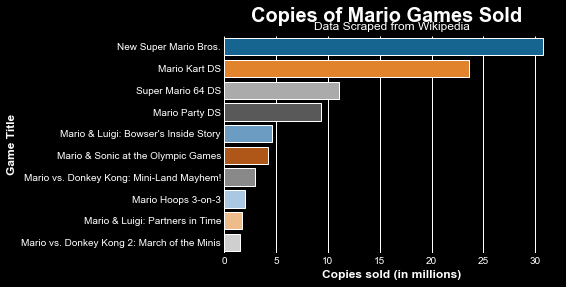

In [52]:
plt.style.use('tableau-colorblind10')
sns.barplot(mario_query['Copies_sold_millions'], mario_query['Game'], edgecolor='white')
plt.suptitle('Copies of Mario Games Sold', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Game Title', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#### The top three best selling Mario Games for Nintendo DS are:

1.) New Super Mario Bros. (31 million)

2.) Mario Kart DS (24 million)

3.) Super Mario 64 DS (11 million)

In [55]:
pokemon_query = pd.read_sql('''SELECT Game, Copies_sold_millions, Release_date FROM nintendo_ds
WHERE Game LIKE '%Pokémon%'
ORDER BY Copies_sold_millions DESC ''', ds_conn)
pokemon_query

,Game,Copies_sold_millions,Release_date
0,Pokémon Diamond and Pearl,17.67,2006-09-28
1,Pokémon Black and White,15.64,2010-09-18
2,Pokémon HeartGold and SoulSilver,12.72,2009-09-12
3,Pokémon Black 2 and White 2,8.52,2012-06-23
4,Pokémon Platinum,7.60,2008-09-13
5,Pokémon Mystery Dungeon: Explorers of Time and...,4.88,2007-09-13
6,Pokémon Mystery Dungeon: Blue Rescue Team,3.49,2005-11-17
7,Pokémon Ranger,2.93,2006-03-23
8,Pokémon Ranger: Shadows of Almia,2.35,2008-03-20
9,Pokémon Mystery Dungeon: Explorers of Sky,1.49,2009-04-18


#### Arguably, the next best Nintendo franchise is Pokemon

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


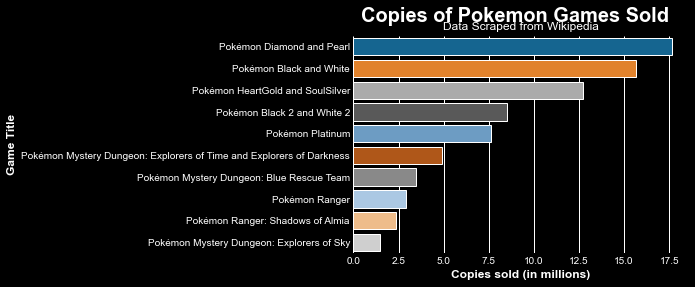

In [60]:
plt.style.use('tableau-colorblind10')
sns.barplot(pokemon_query['Copies_sold_millions'], pokemon_query['Game'], edgecolor='white')
plt.suptitle('Copies of Pokemon Games Sold', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Game Title', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#### The top three best selling Pokemon Games for Nintendo DS are:

1.) Pokémon Diamond and Pearl (18 million)

2.) Pokémon Black and White (16 million)

3.) Pokémon HeartGold and SoulSilver (13 million)

In [57]:
pokemon_query['Copies_sold_millions'].describe()

count    10.000000
mean      7.729000
std       5.811243
min       1.490000
25%       3.070000
50%       6.240000
75%      11.670000
max      17.670000
Name: Copies_sold_millions, dtype: float64

#### The average amount of Ninentdo DS best selling Pokemon games is in the ballpark of 8 million. The median value is around 6 million. While both the mean and median are comparable to Mario game sales, the max values differ by nearly 15 million. New Super Mario Bros. sold about 31 million copies while Pokémon Diamond and Pearl sold about 18 million copies

#### I also noticed that several best-selling games have 'Super' in the game title. As an analyst, I want to see if their is any consistency in the amount of sales as other best sellers

In [58]:
super_query = pd.read_sql('''SELECT Game, Copies_sold_millions, Release_date FROM nintendo_ds
WHERE Game LIKE '%Super%'
ORDER BY Copies_sold_millions DESC ''', ds_conn)
super_query

,Game,Copies_sold_millions,Release_date
0,New Super Mario Bros.,30.80,2006-05-15
1,Super Mario 64 DS,11.06,2004-11-21
2,Kirby Super Star Ultra,2.99,2008-09-29
3,Super Princess Peach,1.70,2005-10-20


In [59]:
super_query['Copies_sold_millions'].describe()

count     4.00000
mean     11.63750
std      13.42967
min       1.70000
25%       2.66750
50%       7.02500
75%      15.99500
max      30.80000
Name: Copies_sold_millions, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


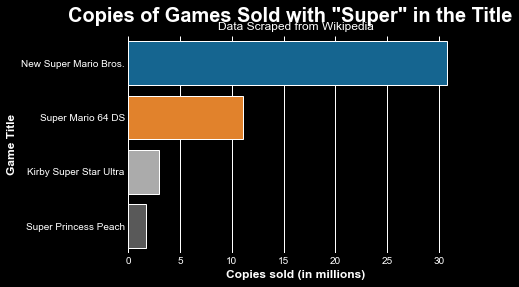

In [61]:
plt.style.use('tableau-colorblind10')
sns.barplot(super_query['Copies_sold_millions'], super_query['Game'], edgecolor='white')
plt.suptitle('Copies of Games Sold with "Super" in the Title', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Game Title', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#### My speculation was correct as two of the top ten best selling Nintendo DS games are New Super Mario Bros. and Super Mario 64 DS which have both exceeded 10 million copies

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


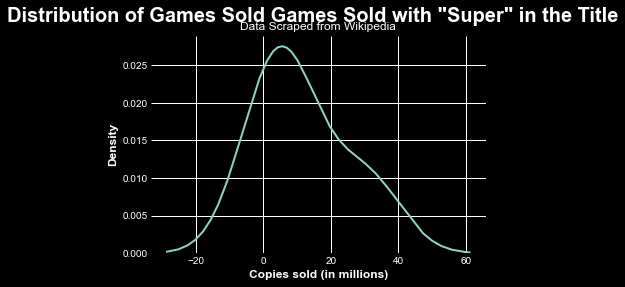

In [62]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Games Sold Games Sold with "Super" in the Title', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
sns.distplot(super_query['Copies_sold_millions'], kde=True, hist=False)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Density', weight ='bold', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [71]:
nintendo_query = pd.read_sql('''SELECT Game, Developer, Copies_sold_millions FROM nintendo_ds
WHERE Developer LIKE '%Nintendo%' LIMIT 12''', ds_conn)
nintendo_query.head(6)

,Game,Developer,Copies_sold_millions
0,New Super Mario Bros.,Nintendo EAD,30.80
1,Nintendogs,Nintendo EAD,23.96
2,Mario Kart DS,Nintendo EAD,23.60
3,Brain Age: Train Your Brain in Minutes a Day!,Nintendo SPD,19.01
4,Brain Age 2: More Training in Minutes a Day!,Nintendo SPD,14.88
5,Animal Crossing: Wild World,Nintendo EAD,11.75


#### As you can see there is more variability with 'Super' titled games. Also, the best selling games for DS were developed by Nintendo as well. Interestingly, sales for Nintendogs and Mariokart are less than 300,000 copies apart while there is a 7 million unit difference between New Super Mario Bros. and Nintendogs

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


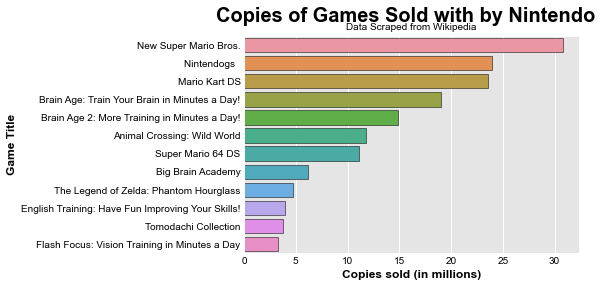

In [74]:
plt.style.use('ggplot')
sns.barplot(nintendo_query['Copies_sold_millions'], nintendo_query['Game'], edgecolor='black')
plt.suptitle('Copies of Games Sold with by Nintendo', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color = 'black').set_fontsize(10)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Game Title', weight ='bold', color='black')
# plt.gca().invert_xaxis()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [200]:
nintendo_ds_genre = pd.read_sql(''' SELECT Genre, COUNT(Genre) AS Genre_count,
                            COUNT(Genre) * 100.0 / (SELECT COUNT(*) FROM nintendo_ds) AS Genre_pct
                            FROM nintendo_ds 
                            GROUP BY Genre
                            ORDER BY Genre_pct DESC LIMIT 10 ''', ds_conn)
nintendo_ds_genre

,Genre,Genre_count,Genre_pct
0,Role-playing,16,21.917808
1,Puzzle,7,9.589041
2,Platform,7,9.589041
3,Puzzleadventure,4,5.479452
4,Action role-playing,4,5.479452
5,Roguelike,3,4.109589
6,Educational,3,4.109589
7,Action-adventure,3,4.109589
8,Racing,2,2.739726
9,Puzzleeducational,2,2.739726


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


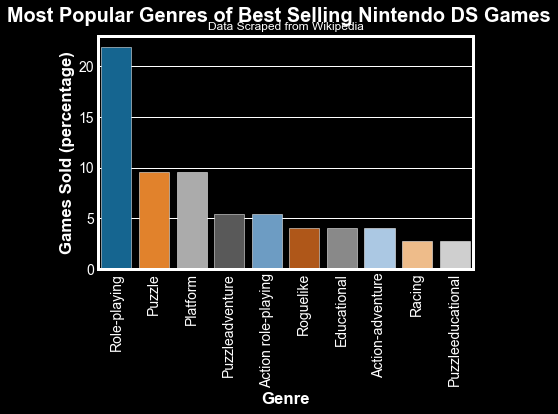

In [202]:
plt.style.use('dark_background')
plt.style.use('tableau-colorblind10')
sns.barplot(nintendo_ds_genre['Genre'],nintendo_ds_genre['Genre_pct'], edgecolor='white')
plt.suptitle('Most Popular Genres of Best Selling Nintendo DS Games', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Genre', weight ='bold', color='white')
plt.ylabel('Games Sold (percentage)', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white', rotation=90)
plt.yticks(color='white')
plt.show()

#### Although the difference between Puzzle and Platform genres is minimal, the role-playing genre encompasses some of the most popular games such as the Pokemon franchise 

# Nintendo Wii

In [75]:
wii_url = 'https://en.wikipedia.org/wiki/List_of_best-selling_Wii_video_games'

In [82]:
nintendo_wii = pd.read_html(wii_url)[2]
nintendo_wii

,No.,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,1,Wii Sports †,82.90 million[4],"November 19, 2006",Sports,Nintendo EAD (Group 2),Nintendo
1,2,Mario Kart Wii †,37.38 million[4][b],"April 10, 2008",Racing,Nintendo EAD (Group 1),Nintendo
2,3,Wii Sports Resort †,33.14 million[4][b],"June 25, 2009",Sports,Nintendo EAD (Group 2),Nintendo
3,4,New Super Mario Bros. Wii †,30.32 million[4],"November 12, 2009",Platform,Nintendo EAD (Group 4),Nintendo
4,5,Wii Play,28.02 million[4][b],"December 2, 2006",Party,Nintendo EAD (Group 2),Nintendo
...,...,...,...,...,...,...,...
58,59,Red Steel,1 million[24],"November 19, 2006",First-person shooter,Ubisoft Paris,Ubisoft
59,59,Rock Band,1 million[29],"June 22, 2008",Rhythm,Pi Studios,MTV GamesElectronic Arts
60,59,Zumba Fitness,1 million[30],"November 18, 2010",Fitness,Pipeworks Software,Majesco Entertainment505 Games
61,59,Super Mario Bros. 3[f],1 million[31][32],"November 5, 2007",Platform,Nintendo EAD,Nintendo


In [84]:
nintendo_wii.dtypes

No.                 int64
Game               object
Copies sold        object
Release date[a]    object
Genre(s)           object
Developer(s)       object
Publisher(s)       object
dtype: object

In [85]:
del nintendo_wii['No.']

In [86]:
for column in nintendo_wii.columns:
    nintendo_wii[column] = nintendo_wii[column].str.replace(r"\(.*\)", " ")
    nintendo_wii[column] = nintendo_wii[column].str.replace(r"\[.*\]", " ")
    nintendo_wii[column] = nintendo_wii[column].str.replace(r"million", " ")
    nintendo_wii[column] = nintendo_wii[column].str.replace(r"†", " ")
    nintendo_wii[column] = nintendo_wii[column].str.replace(r">", " ")
    nintendo_wii[column] = nintendo_wii[column].str.replace(r"shipped", " ")

C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/3450842750.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_wii[column] = nintendo_wii[column].str.replace(r"\(.*\)", " ")
C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/3450842750.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_wii[column] = nintendo_wii[column].str.replace(r"\[.*\]", " ")


In [88]:
nintendo_wii.rename(columns= {'Release date[a]': 'Release_date',
                             'Genre(s)':        'Genre',
                             'Developer(s)':    'Developer',
                             'Publisher(s)':    'Publisher',
                             'Copies sold':     'Copies_sold_millions'}, inplace=True)
nintendo_wii

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,Wii Sports,82.90,"November 19, 2006",Sports,Nintendo EAD,Nintendo
1,Mario Kart Wii,37.38,"April 10, 2008",Racing,Nintendo EAD,Nintendo
2,Wii Sports Resort,33.14,"June 25, 2009",Sports,Nintendo EAD,Nintendo
3,New Super Mario Bros. Wii,30.32,"November 12, 2009",Platform,Nintendo EAD,Nintendo
4,Wii Play,28.02,"December 2, 2006",Party,Nintendo EAD,Nintendo
...,...,...,...,...,...,...
58,Red Steel,1,"November 19, 2006",First-person shooter,Ubisoft Paris,Ubisoft
59,Rock Band,1,"June 22, 2008",Rhythm,Pi Studios,MTV GamesElectronic Arts
60,Zumba Fitness,1,"November 18, 2010",Fitness,Pipeworks Software,Majesco Entertainment505 Games
61,Super Mario Bros. 3,1,"November 5, 2007",Platform,Nintendo EAD,Nintendo


In [89]:
nintendo_wii['Copies_sold_millions'] = nintendo_wii['Copies_sold_millions'].astype(float)
nintendo_wii['Release_date'] = [str(datetime.datetime.strptime(i, '%B %d, %Y').date()) for i in nintendo_wii['Release_date']]

In [126]:
nintendo_wii.head(40)

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,Wii Sports,82.90,2006-11-19,Sports,Nintendo EAD,Nintendo
1,Mario Kart Wii,37.38,2008-04-10,Racing,Nintendo EAD,Nintendo
2,Wii Sports Resort,33.14,2009-06-25,Sports,Nintendo EAD,Nintendo
3,New Super Mario Bros. Wii,30.32,2009-11-12,Platform,Nintendo EAD,Nintendo
4,Wii Play,28.02,2006-12-02,Party,Nintendo EAD,Nintendo
5,Wii Fit,22.67,2007-12-01,Exergaming,Nintendo EAD,Nintendo
6,Wii Fit Plus,21.13,2009-10-01,Exergaming,Nintendo EAD,Nintendo
7,Super Smash Bros. Brawl,13.32,2008-01-31,Fighting,Sora Ltd.ad hoc development team,Nintendo
8,Super Mario Galaxy,12.80,2007-11-01,Platform,Nintendo EAD,Nintendo
9,Just Dance 3,9.92,2011-10-07,Rhythm,Ubisoft Paris,Ubisoft


In [92]:
nintendo_wii.to_csv('nintendo_wii.csv', header=True, index=False)
nintendo_wii_csv = pd.read_csv('nintendo_wii.csv')
nintendo_wii_csv

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,Wii Sports,82.90,2006-11-19,Sports,Nintendo EAD,Nintendo
1,Mario Kart Wii,37.38,2008-04-10,Racing,Nintendo EAD,Nintendo
2,Wii Sports Resort,33.14,2009-06-25,Sports,Nintendo EAD,Nintendo
3,New Super Mario Bros. Wii,30.32,2009-11-12,Platform,Nintendo EAD,Nintendo
4,Wii Play,28.02,2006-12-02,Party,Nintendo EAD,Nintendo
...,...,...,...,...,...,...
58,Red Steel,1.00,2006-11-19,First-person shooter,Ubisoft Paris,Ubisoft
59,Rock Band,1.00,2008-06-22,Rhythm,Pi Studios,MTV GamesElectronic Arts
60,Zumba Fitness,1.00,2010-11-18,Fitness,Pipeworks Software,Majesco Entertainment505 Games
61,Super Mario Bros. 3,1.00,2007-11-05,Platform,Nintendo EAD,Nintendo


In [93]:
nintendo_wii_csv.to_sql('nintendo_wii_games', ds_conn, if_exists='replace', index=False)

In [95]:
wii = pd.read_sql(''' SELECT DISTINCT * FROM nintendo_wii_games ''', ds_conn)
wii.dtypes

Game                     object
Copies_sold_millions    float64
Release_date             object
Genre                    object
Developer                object
Publisher                object
dtype: object

In [119]:
wii_games_sold_query = pd.read_sql(''' SELECT Game, Copies_sold_millions FROM nintendo_wii_games 
                                       ORDER BY Copies_sold_millions DESC  LIMIT 10''', ds_conn)
wii_games_sold_query

,Game,Copies_sold_millions
0,Wii Sports,82.90
1,Mario Kart Wii,37.38
2,Wii Sports Resort,33.14
3,New Super Mario Bros. Wii,30.32
4,Wii Play,28.02
5,Wii Fit,22.67
6,Wii Fit Plus,21.13
7,Super Smash Bros. Brawl,13.32
8,Super Mario Galaxy,12.80
9,Just Dance 3,9.92


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


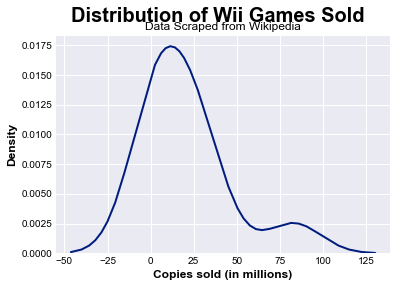

In [106]:
plt.style.use('seaborn-darkgrid')
plt.suptitle('Distribution of Wii Games Sold', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color='black').set_fontsize(12)
sns.distplot(wii_games_sold_query['Copies_sold_millions'], kde=True, hist=False)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Density', weight ='bold', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [120]:
wii_games_sold_query['Copies_sold_millions'].describe()

count    10.000000
mean     29.160000
std      21.000993
min       9.920000
25%      15.272500
50%      25.345000
75%      32.435000
max      82.900000
Name: Copies_sold_millions, dtype: float64

#### Considering that the Wii was released 8 years later than the Nintendo DS-you can see the popularity of Wii is stronger than the Nintendo DS console.  The mean and median for the Wii is approximately 1.5 times higher (30 million/25 million) compared to the DS (18 million/15 million), respectively. However, Wii Sports crushes New Super Mario Bros. by almost 50 million more units sold

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


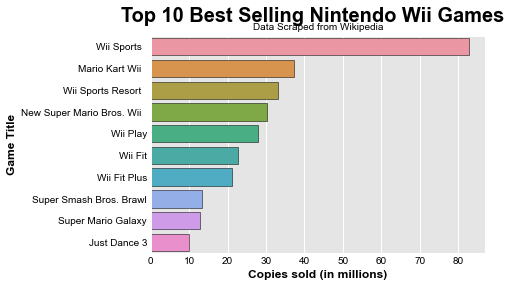

In [114]:
plt.style.use('ggplot')
sns.barplot(wii_games_sold_query['Copies_sold_millions'], wii_games_sold_query['Game'], edgecolor='black')
plt.suptitle('Top 10 Best Selling Nintendo Wii Games', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color = 'black').set_fontsize(10)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Game Title', weight ='bold', color='black')
# plt.gca().invert_xaxis()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [121]:
mario_wii = pd.read_sql(''' SELECT Game, Copies_sold_millions FROM nintendo_wii_games 
                            WHERE Game LIKE '%Mario%' AND Developer LIKE '%Nintendo%'
                            ORDER BY Copies_sold_millions DESC  LIMIT 10''', ds_conn)
mario_wii

,Game,Copies_sold_millions
0,Mario Kart Wii,37.38
1,New Super Mario Bros. Wii,30.32
2,Super Mario Galaxy,12.80
3,Super Mario Galaxy 2,7.41
4,Super Mario All-Stars: 25th Anniversary Edition,2.24
5,Mario Sports Mix,1.98
6,Super Mario Bros. 3,1.00


In [122]:
mario_wii.describe()

,Copies_sold_millions
count,7.000000
mean,13.304286
std,14.754800
min,1.000000
25%,2.110000
50%,7.410000
75%,21.560000
max,37.380000


#### Similar to the DS, Mario-related games are some of the most popular titles with an average of 13 million copies sold. Between the Wii and DS platforms, Mario Kart Wii sold the most copies at 37 million.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


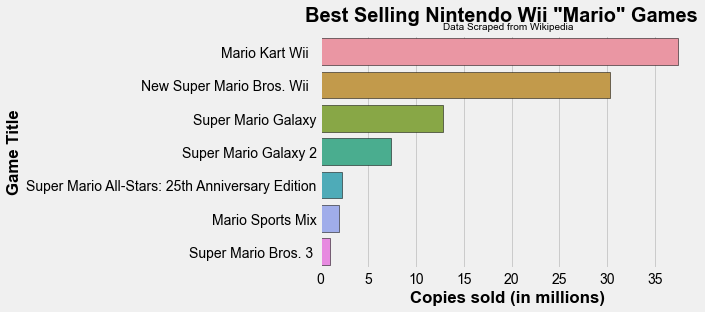

In [123]:
plt.style.use('fivethirtyeight')
sns.barplot(mario_wii['Copies_sold_millions'], mario_wii['Game'], edgecolor='black')
plt.suptitle('Best Selling Nintendo Wii "Mario" Games', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color = 'black').set_fontsize(10)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Game Title', weight ='bold', color='black')
# plt.gca().invert_xaxis()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [127]:
pd.read_sql(''' SELECT Game, Copies_sold_millions FROM nintendo_wii_games 
                            WHERE Game LIKE '%Poké%'
                            ORDER BY Copies_sold_millions DESC  LIMIT 10''', ds_conn)

,Game,Copies_sold_millions
0,Pokémon Battle Revolution,1.95
1,PokéPark Wii: Pikachu's Adventure,1.25


#### As you can see, Pokémon is not nearly as popular for Wii as it is for the DS with less than 2 million copies sold for each.

In [131]:
wii_name_query = pd.read_sql(''' SELECT DISTINCT Game, Copies_sold_millions FROM nintendo_wii_games 
                            WHERE Game LIKE '%Wii%' 
                            ORDER BY Copies_sold_millions DESC  ''', ds_conn)
wii_name_query

,Game,Copies_sold_millions
0,Wii Sports,82.90
1,Mario Kart Wii,37.38
2,Wii Sports Resort,33.14
3,New Super Mario Bros. Wii,30.32
4,Wii Play,28.02
5,Wii Fit,22.67
6,Wii Fit Plus,21.13
7,Wii Party,9.35
8,Big Brain Academy: Wii Degree,3.34
9,Wii Music,2.86


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


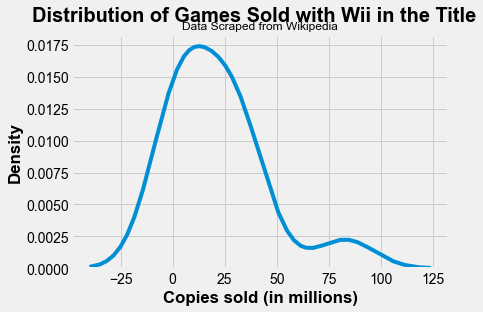

In [130]:
plt.style.use('fivethirtyeight')
plt.suptitle('Distribution of Games Sold with Wii in the Title', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color='black').set_fontsize(12)
sns.distplot(wii_name_query['Copies_sold_millions'], kde=True, hist=False)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Density', weight ='bold', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


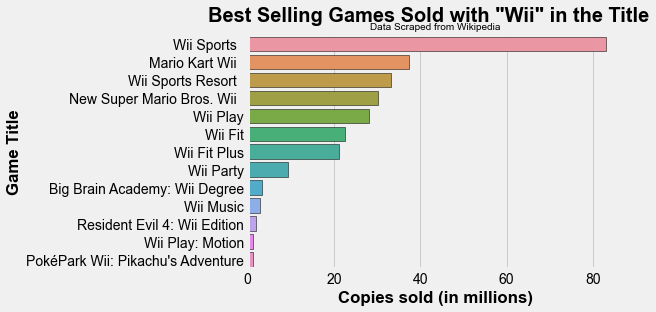

In [135]:
plt.style.use('fivethirtyeight')
sns.barplot(wii_name_query['Copies_sold_millions'], wii_name_query['Game'], edgecolor='black')
plt.suptitle('Best Selling Games Sold with "Wii" in the Title', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color = 'black').set_fontsize(10)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Game Title', weight ='bold', color='black')
# plt.gca().invert_xaxis()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

In [134]:
wii_name_query['Copies_sold_millions'].describe()

count    13.000000
mean     21.201538
std      22.918519
min       1.250000
25%       2.860000
50%      21.130000
75%      30.320000
max      82.900000
Name: Copies_sold_millions, dtype: float64

#### Games  with "Wii" in the Title sold the best out of all best selling Wii games. The mean (21 million) and max values (83 million) are higher than any other title sold for Wii. The max value is more than double the best selling Nintendo DS game, New Super Mario Bros.

In [136]:
genre_pct = pd.read_sql(''' SELECT Genre, COUNT(Genre) AS Genre_count,
                            COUNT(Genre) * 100.0 / (SELECT COUNT(*) FROM nintendo_wii_games) AS Genre_pct
                            FROM nintendo_wii_games 
                            GROUP BY Genre
                            ORDER BY Genre_pct DESC LIMIT 15 ''', ds_conn)
genre_pct

,Genre,Genre_count,Genre_pct
0,Sports,13,20.634921
1,Platform,10,15.873016
2,Party,8,12.698413
3,Rhythm,4,6.349206
4,Action-adventure,4,6.349206
5,Exergaming,3,4.761905
6,Music: rhythm,2,3.174603
7,Fitness,2,3.174603
8,First-person shooter,2,3.174603
9,Fighting,2,3.174603


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


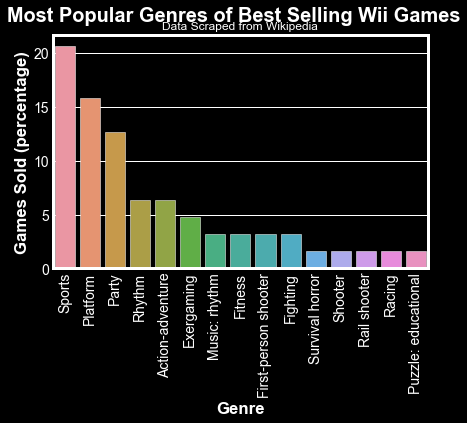

In [144]:
plt.style.use('dark_background')
plt.style.use('tableau-colorblind10')
sns.barplot(genre_pct['Genre'],genre_pct['Genre_pct'], edgecolor='white')
plt.suptitle('Most Popular Genres of Best Selling Wii Games', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Genre', weight ='bold', color='white')
plt.ylabel('Games Sold (percentage)', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white', rotation=90)
plt.yticks(color='white')
plt.show()

#### The most popular genre for Wii games, Sports, is recognizable because the Wii designed motion sensor technology for many titles. Its best selling title, Wii Sports, accompanied the sale of the Wii console, which may account for the boost in sales within the sports genre.

In [147]:
publisher_pct = pd.read_sql(''' SELECT Publisher, COUNT(Publisher) AS Publisher_count,
                            COUNT(Publisher) * 100.0 / (SELECT COUNT(*) FROM nintendo_wii_games) AS Publisher_pct
                            FROM nintendo_wii_games 
                            GROUP BY Publisher
                            ORDER BY Publisher_pct DESC LIMIT 5 ''', ds_conn)
publisher_pct

,Publisher,Publisher_count,Publisher_pct
0,Nintendo,35,55.555556
1,Ubisoft,6,9.523810
2,Activision,3,4.761905
3,Midway Games,2,3.174603
4,JP: NintendoNA/PAL: Sega,2,3.174603


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


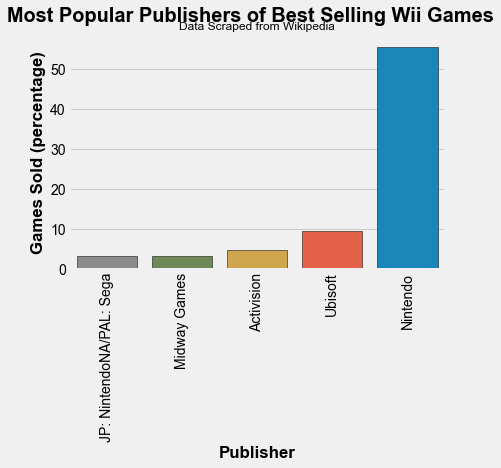

In [152]:
plt.style.use('fivethirtyeight')
sns.barplot(publisher_pct['Publisher'],publisher_pct['Publisher_pct'], edgecolor='black')
plt.suptitle('Most Popular Publishers of Best Selling Wii Games', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color='black').set_fontsize(12)
plt.xlabel('Publisher', weight ='bold', color='black')
plt.ylabel('Games Sold (percentage)', weight ='bold', color='black')
plt.gca().invert_xaxis()
plt.xticks(color='black', rotation=90)
plt.yticks(color='black')
plt.show()

#### Expectedly, Nintendo is the main publisher for Wii games. Ubisoft and Activision both publish titles such as Rayman and Call of Duty which can be played on the Wii, Playstation, or Xbox.

# Game Boy

In [153]:
game_boy_url = 'https://en.wikipedia.org/wiki/List_of_best-selling_Game_Boy_video_games'

In [155]:
nintendo_game_boy = pd.read_html(game_boy_url)[2]
nintendo_game_boy

,Game,Developer(s)[a],Publisher[a],Platform,Release date[b],Sales,Ref.
0,Pokémon Red / Green / Blue / Yellow,Game Freak,Nintendo,GB,"February 27, 1996",46020000,[1][2]
1,Tetris †,Nintendo R&D1,Nintendo,GB,"June 14, 1989",35000000,[3]
2,Pokémon Gold / Silver / Crystal,Game Freak,Nintendo,GBC,"November 21, 1999",29490000,[2]
3,Super Mario Land,Nintendo R&D1,Nintendo,GB,"April 21, 1989",18140000,[4]
4,Super Mario Land 2: 6 Golden Coins,Nintendo R&D1,Nintendo,GB,"October 21, 1992",11180000,[4]
...,...,...,...,...,...,...,...
61,Space Invaders,Taito,Nintendo,GB,1994,1000000,[15]
62,The Smurfs,Bit Managers,Infogrames,GB,1994,1000000,[15]
63,Street Fighter II,Sun L,Nintendo,GB,"August 11, 1995",1000000,[15]
64,Game & Watch Gallery,Tose,Nintendo,GB,"February 1, 1997",1000000,[6]


In [156]:
del nintendo_game_boy['Ref.']

In [170]:
nintendo_game_boy.dtypes

Game                     object
Developer                object
Publisher[a]             object
Platform                 object
Release_date             object
Copies_sold_millions    float64
dtype: object

In [179]:
nintendo_game_boy.rename(columns= {'Release date[b]': 'Release_date',
                             'Genre(s)':        'Genre',
                             'Developer(s)[a]':    'Developer',
                             'Publisher[a]':    'Publisher',
                             'Sales':     'Copies_sold_millions'}, inplace=True)
nintendo_game_boy

,Game,Developer,Publisher,Platform,Release_date,Copies_sold_millions
0,Pokémon Red / Green / Blue / Yellow,Game Freak,Nintendo,GB,"February 27, 1996",46020000.0
1,Tetris,Nintendo R&D1,Nintendo,GB,"June 14, 1989",35000000.0
2,Pokémon Gold / Silver / Crystal,Game Freak,Nintendo,GBC,"November 21, 1999",29490000.0
3,Super Mario Land,Nintendo R&D1,Nintendo,GB,"April 21, 1989",18140000.0
4,Super Mario Land 2: 6 Golden Coins,Nintendo R&D1,Nintendo,GB,"October 21, 1992",11180000.0
...,...,...,...,...,...,...
61,Space Invaders,Taito,Nintendo,GB,1994,1000000.0
62,The Smurfs,Bit Managers,Infogrames,GB,1994,1000000.0
63,Street Fighter II,Sun L,Nintendo,GB,"August 11, 1995",1000000.0
64,Game & Watch Gallery,Tose,Nintendo,GB,"February 1, 1997",1000000.0


In [180]:
nintendo_game_boy['Copies_sold_millions'] = nintendo_game_boy['Copies_sold_millions'].astype(str)

In [181]:
for column in nintendo_game_boy.columns:
    nintendo_game_boy[column] = nintendo_game_boy[column].str.replace(r"\(.*\)", " ")
    nintendo_game_boy[column] = nintendo_game_boy[column].str.replace(r"\[.*\]", " ")
    nintendo_game_boy[column] = nintendo_game_boy[column].str.replace(r"million", " ")

C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/3931001622.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_game_boy[column] = nintendo_game_boy[column].str.replace(r"\(.*\)", " ")
C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/3931001622.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  nintendo_game_boy[column] = nintendo_game_boy[column].str.replace(r"\[.*\]", " ")


In [190]:
# nintendo_game_boy['Copies_sold_millions'] = nintendo_game_boy['Copies_sold_millions'].astype(float)
nintendo_game_boy['Copies_sold_millions'] = nintendo_game_boy['Copies_sold_millions'] / 1000000
# nintendo_game_boy['Release_date'] = [str(datetime.datetime.strptime(i, '%B %d, %Y').date()) for i in nintendo_game_boy['Release_date']]

In [192]:
nintendo_game_boy.to_csv('nintendo_game_boy.csv', header=True, index=False)
nintendo_game_boy = pd.read_csv('nintendo_game_boy.csv')
nintendo_game_boy

,Game,Developer,Publisher,Platform,Release_date,Copies_sold_millions
0,Pokémon Red / Green / Blue / Yellow,Game Freak,Nintendo,GB,"February 27, 1996",46.02
1,Tetris,Nintendo R&D1,Nintendo,GB,"June 14, 1989",35.00
2,Pokémon Gold / Silver / Crystal,Game Freak,Nintendo,GBC,"November 21, 1999",29.49
3,Super Mario Land,Nintendo R&D1,Nintendo,GB,"April 21, 1989",18.14
4,Super Mario Land 2: 6 Golden Coins,Nintendo R&D1,Nintendo,GB,"October 21, 1992",11.18
...,...,...,...,...,...,...
61,Space Invaders,Taito,Nintendo,GB,1994,1.00
62,The Smurfs,Bit Managers,Infogrames,GB,1994,1.00
63,Street Fighter II,Sun L,Nintendo,GB,"August 11, 1995",1.00
64,Game & Watch Gallery,Tose,Nintendo,GB,"February 1, 1997",1.00


In [193]:
nintendo_game_boy.to_sql('nintendo_game_boy_games', ds_conn, if_exists='replace', index=False)

In [194]:
game_boy = pd.read_sql(''' SELECT * FROM nintendo_game_boy_games ''', ds_conn)
game_boy

,Game,Developer,Publisher,Platform,Release_date,Copies_sold_millions
0,Pokémon Red / Green / Blue / Yellow,Game Freak,Nintendo,GB,"February 27, 1996",46.02
1,Tetris,Nintendo R&D1,Nintendo,GB,"June 14, 1989",35.00
2,Pokémon Gold / Silver / Crystal,Game Freak,Nintendo,GBC,"November 21, 1999",29.49
3,Super Mario Land,Nintendo R&D1,Nintendo,GB,"April 21, 1989",18.14
4,Super Mario Land 2: 6 Golden Coins,Nintendo R&D1,Nintendo,GB,"October 21, 1992",11.18
...,...,...,...,...,...,...
61,Space Invaders,Taito,Nintendo,GB,1994,1.00
62,The Smurfs,Bit Managers,Infogrames,GB,1994,1.00
63,Street Fighter II,Sun L,Nintendo,GB,"August 11, 1995",1.00
64,Game & Watch Gallery,Tose,Nintendo,GB,"February 1, 1997",1.00


In [195]:
top_game_boy_games = pd.read_sql(''' SELECT Game, Copies_sold_millions FROM nintendo_game_boy_games 
                            GROUP BY Game
                            ORDER BY Copies_sold_millions DESC LIMIT 10 ''', ds_conn)
top_game_boy_games.head(3)

,Game,Copies_sold_millions
0,Pokémon Red / Green / Blue / Yellow,46.02
1,Tetris,35.00
2,Pokémon Gold / Silver / Crystal,29.49


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


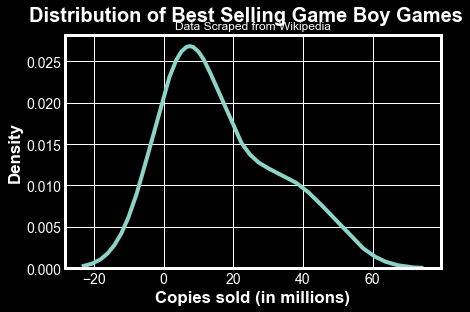

In [196]:
plt.style.use('dark_background')
plt.suptitle('Distribution of Best Selling Game Boy Games', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
sns.distplot(top_game_boy_games['Copies_sold_millions'], kde=True, hist=False)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='white')
plt.ylabel('Density', weight ='bold', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


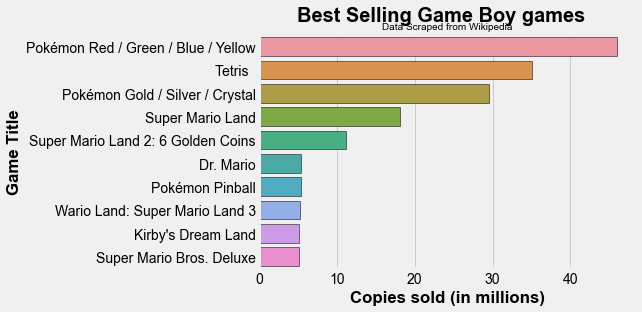

In [198]:
plt.style.use('fivethirtyeight')
sns.barplot(top_game_boy_games['Copies_sold_millions'], top_game_boy_games['Game'], edgecolor='black')
plt.suptitle('Best Selling Game Boy games', weight ='bold', color = 'black').set_fontsize(20)
plt.title('Data Scraped from Wikipedia', color = 'black').set_fontsize(10)
plt.xlabel('Copies sold (in millions)', weight ='bold', color='black')
plt.ylabel('Game Title', weight ='bold', color='black')
# plt.gca().invert_xaxis()
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

#### Notably, every game on the bestselling list is part of the franchises Pokemon and Mario.

#### I used a left join on the scraped data in order to build a larger database that includes all the existing Wii database entries and information related to games sold on multiple Nintendo and non-Nintendo consoles.

In [204]:
ds_wii = pd.read_sql(''' SELECT * FROM nintendo_ds
                         LEFT JOIN nintendo_wii_games
                         ON nintendo_ds.Game = nintendo_wii_games.Game ''', ds_conn)
ds_wii

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,New Super Mario Bros.,30.80,2006-05-15,Platform,Nintendo EAD,Nintendo,None,NaN,None,None,None,None
1,Nintendogs,23.96,2005-04-21,Pet-raising simulation,Nintendo EAD,Nintendo,None,NaN,None,None,None,None
2,Mario Kart DS,23.60,2005-11-14,Racing,Nintendo EAD,Nintendo,None,NaN,None,None,None,None
3,Brain Age: Train Your Brain in Minutes a Day!,19.01,2005-05-19,Puzzle,Nintendo SPD,Nintendo,None,NaN,None,None,None,None
4,Pokémon Diamond and Pearl,17.67,2006-09-28,Role-playing,Game Freak,The Pokémon CompanyNintendo,None,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Metroid Prime Hunters,1.08,2006-06-01,First-personaction-adventure,Nintendo Software Technology,Nintendo,None,NaN,None,None,None,None
69,Final Fantasy XII: Revenant Wings,1.04,2007-04-26,Tactical role-playing,Square Enix,Square Enix,None,NaN,None,None,None,None
70,Drawn to Life,1.00,2007-09-10,Action-adventureplatform,5th Cell,THQ,None,NaN,None,None,None,None
71,Scribblenauts,1.00,2009-09-15,Puzzleaction,5th Cell,Warner Bros. Interactive Entertainment,None,NaN,None,None,None,None


# Bestsellers

In [338]:
best_seller_url = 'https://en.wikipedia.org/wiki/List_of_best-selling_video_games'

In [339]:
best_sellers = pd.read_html(best_seller_url)[1]
best_sellers.head(3)

,Title,Sales,Series,Platform(s),Initial release date,Developer(s)[a],Publisher(s)[a],Ref
0,Minecraft,"238,000,000[b]",Minecraft,Multi-platform[c],"November 18, 2011[d]",Mojang Studios,Xbox Game Studios,[4][5]
1,Grand Theft Auto V,170000000,Grand Theft Auto,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games,[6]
2,Tetris (EA),100000000,Tetris,Multi-platform[e],"September 12, 2006",EA Mobile,Electronic Arts,[7][8]


In [340]:
best_sellers.dtypes

Title                   object
Sales                   object
Series                  object
Platform(s)             object
Initial release date    object
Developer(s)[a]         object
Publisher(s)[a]         object
Ref                     object
dtype: object

In [341]:
del best_sellers['Ref']
del best_sellers['Series']

In [342]:
best_sellers.rename(columns= {'Title': 'Game',
                              'Release date[b]': 'Release_date',
                                'Developer(s)[a]': 'Developer',
                                'Publisher(s)[a]':    'Publisher',
                              'Platform(s)': 'Platform',
                              'Sales':        'Sales_in_millions', 
                             'Initial release date': 'Release_date'}, inplace=True)
best_sellers.head(3)

,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Minecraft,"238,000,000[b]",Multi-platform[c],"November 18, 2011[d]",Mojang Studios,Xbox Game Studios
1,Grand Theft Auto V,170000000,Multi-platform,"September 17, 2013",Rockstar North,Rockstar Games
2,Tetris (EA),100000000,Multi-platform[e],"September 12, 2006",EA Mobile,Electronic Arts


In [343]:
for column in best_sellers.columns:
    best_sellers[column] = best_sellers[column].str.replace(r"\(.*\)", " ")
    best_sellers[column] = best_sellers[column].str.replace(r"\[.*\]", " ")
    best_sellers[column] = best_sellers[column].str.replace(r",", " ")
    best_sellers[column] = best_sellers[column].str.replace(r" ", "")

C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/4124815717.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  best_sellers[column] = best_sellers[column].str.replace(r"\(.*\)", " ")
C:\Users\jake_\AppData\Local\Temp/ipykernel_9936/4124815717.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  best_sellers[column] = best_sellers[column].str.replace(r"\[.*\]", " ")


In [354]:
best_sellers

,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Minecraft,238.00,Multi-platform,November182011,MojangStudios,XboxGameStudios
1,GrandTheftAutoV,170.00,Multi-platform,September172013,RockstarNorth,RockstarGames
2,Tetris,100.00,Multi-platform,September122006,EAMobile,ElectronicArts
3,WiiSports,82.90,Wii,November192006,NintendoEAD,Nintendo
4,PUBG:Battlegrounds,75.00,Multi-platform,December202017,PUBGCorporation,PUBGCorporation
5,SuperMarioBros.,58.00,Multi-platform,September131985,NintendoR&D4,Nintendo
6,MarioKart8/Deluxe,56.87,WiiU/Switch,May292014,NintendoEAD,Nintendo
7,RedDeadRedemption2,46.00,Multi-platform,October262018,RockstarStudios,RockstarGames
8,Terraria,44.50,Multi-platform,May162011,Re-Logic,Re-Logic/505Games
9,WiiFit/Plus,43.80,Wii,December12007,NintendoEAD,Nintendo


In [345]:
best_sellers['Sales_in_millions'] = best_sellers['Sales_in_millions'].astype(int)
best_sellers['Sales_in_millions'] = best_sellers['Sales_in_millions'].div(1000000).round(2)
best_sellers.head(3)

,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Minecraft,238.0,Multi-platform,November182011,MojangStudios,XboxGameStudios
1,GrandTheftAutoV,170.0,Multi-platform,September172013,RockstarNorth,RockstarGames
2,Tetris,100.0,Multi-platform,September122006,EAMobile,ElectronicArts


In [346]:
best_sellers.to_csv('best_selling_video_games.csv')
best_selling_games = pd.read_csv('best_selling_video_games.csv')
best_selling_games.head(3)

,Unnamed: 0,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,0,Minecraft,238.0,Multi-platform,November182011,MojangStudios,XboxGameStudios
1,1,GrandTheftAutoV,170.0,Multi-platform,September172013,RockstarNorth,RockstarGames
2,2,Tetris,100.0,Multi-platform,September122006,EAMobile,ElectronicArts


In [347]:
del best_selling_games['Unnamed: 0']

In [348]:
best_selling_games.head(3)

,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Minecraft,238.0,Multi-platform,November182011,MojangStudios,XboxGameStudios
1,GrandTheftAutoV,170.0,Multi-platform,September172013,RockstarNorth,RockstarGames
2,Tetris,100.0,Multi-platform,September122006,EAMobile,ElectronicArts


In [349]:
best_selling_games.to_sql('best_selling_video_games', ds_conn, if_exists='replace', index=False)

In [373]:
pd.read_sql('''SELECT * FROM best_selling_video_games''', ds_conn)

,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Minecraft,238.00,Multi-platform,November182011,MojangStudios,XboxGameStudios
1,GrandTheftAutoV,170.00,Multi-platform,September172013,RockstarNorth,RockstarGames
2,Tetris,100.00,Multi-platform,September122006,EAMobile,ElectronicArts
3,WiiSports,82.90,Wii,November192006,NintendoEAD,Nintendo
4,PUBG:Battlegrounds,75.00,Multi-platform,December202017,PUBGCorporation,PUBGCorporation
5,SuperMarioBros.,58.00,Multi-platform,September131985,NintendoR&D4,Nintendo
6,MarioKart8/Deluxe,56.87,WiiU/Switch,May292014,NintendoEAD,Nintendo
7,RedDeadRedemption2,46.00,Multi-platform,October262018,RockstarStudios,RockstarGames
8,Terraria,44.50,Multi-platform,May162011,Re-Logic,Re-Logic/505Games
9,WiiFit/Plus,43.80,Wii,December12007,NintendoEAD,Nintendo


In [350]:
best_sell = pd.read_sql(''' SELECT * FROM nintendo_wii_games
                            LEFT JOIN best_selling_video_games
                            ON best_selling_video_games.Sales_in_millions = nintendo_wii_games.Copies_sold_millions 
                            ''', ds_conn)
best_sell

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher,Game,Sales_in_millions,Platform,Release_date,Developer,Publisher
0,Wii Sports,82.90,2006-11-19,Sports,Nintendo EAD,Nintendo,WiiSports,82.90,Wii,November192006,NintendoEAD,Nintendo
1,Mario Kart Wii,37.38,2008-04-10,Racing,Nintendo EAD,Nintendo,MarioKartWii,37.38,Wii,April102008,NintendoEAD,Nintendo
2,Wii Sports Resort,33.14,2009-06-25,Sports,Nintendo EAD,Nintendo,WiiSportsResort,33.14,Wii,June252009,NintendoEAD,Nintendo
3,New Super Mario Bros. Wii,30.32,2009-11-12,Platform,Nintendo EAD,Nintendo,NewSuperMarioBros.Wii,30.32,Wii,November112009,NintendoEAD,Nintendo
4,Wii Play,28.02,2006-12-02,Party,Nintendo EAD,Nintendo,WiiPlay,28.02,Wii,December22006,NintendoEAD,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Red Steel,1.00,2006-11-19,First-person shooter,Ubisoft Paris,Ubisoft,None,NaN,None,None,None,None
59,Rock Band,1.00,2008-06-22,Rhythm,Pi Studios,MTV GamesElectronic Arts,None,NaN,None,None,None,None
60,Zumba Fitness,1.00,2010-11-18,Fitness,Pipeworks Software,Majesco Entertainment505 Games,None,NaN,None,None,None,None
61,Super Mario Bros. 3,1.00,2007-11-05,Platform,Nintendo EAD,Nintendo,None,NaN,None,None,None,None


#### I used the intersect and union commands in order to contain common columns more easily

In [351]:
best_sell_wii = pd.read_sql(''' SELECT * FROM nintendo_wii_games
                                UNION
                                SELECT * FROM best_selling_video_games
                                EXCEPT
                                SELECT * FROM nintendo_wii_games
                                INTERSECT
                                SELECT * FROM best_selling_video_games ''', ds_conn)
best_sell_wii

,Game,Copies_sold_millions,Release_date,Genre,Developer,Publisher
0,AnimalCrossing:NewHorizons,40.17,NintendoSwitch,March202020,NintendoEPD,Nintendo
1,Borderlands2,27.00,Multi-platform,September182012,GearboxSoftware,2KGames
2,CallofDuty:BlackOps,26.20,Multi-platform,November92010,Treyarch,Activision
3,CallofDuty:BlackOpsII,24.20,Multi-platform,November122012,Treyarch,Activision
4,CallofDuty:ModernWarfare,30.00,Multi-platform,October252019,InfinityWard,Activision
5,CallofDuty:ModernWarfare2,22.70,Multi-platform,November102009,InfinityWard,Activision
6,CallofDuty:ModernWarfare3,26.50,Multi-platform,November82011,InfinityWard/Sledgehammer,Activision
7,DiabloIII/ReaperofSouls,30.00,Multi-platform,May162012,BlizzardEntertainment,BlizzardEntertainment
8,DuckHunt,28.30,NES,April211984,NintendoR&D1,Nintendo
9,FIFA18,24.00,Multi-platform,September292017,EAVancouver,EASports


In [352]:
del best_sell_wii['Release_date']
del best_sell_wii['Genre']

In [353]:
best_sell_wii.head(3)

,Game,Copies_sold_millions,Developer,Publisher
0,AnimalCrossing:NewHorizons,40.17,NintendoEPD,Nintendo
1,Borderlands2,27.00,GearboxSoftware,2KGames
2,CallofDuty:BlackOps,26.20,Treyarch,Activision


In [356]:
all_three_consoles = pd.read_sql(''' SELECT Game, Platform, Sales_in_millions FROM best_selling_video_games
                                    WHERE Platform = 'Wii' OR Platform LIKE '%GameBoy%' OR Platform = 'NintendoDS'
                                    GROUP BY Game
                                    ORDER BY Sales_in_millions DESC ''', ds_conn)
all_three_consoles

,Game,Platform,Sales_in_millions
0,WiiSports,Wii,82.90
1,WiiFit/Plus,Wii,43.80
2,Tetris,GameBoy/NES,43.00
3,MarioKartWii,Wii,37.38
4,WiiSportsResort,Wii,33.14
5,PokémonRed/Green/Blue/Yellow,GameBoy/Color/Nintendo3DS,32.88
6,NewSuperMarioBros.,NintendoDS,30.80
7,NewSuperMarioBros.Wii,Wii,30.32
8,PokémonGold/Silver/Crystal,GameBoyColor,29.49
9,WiiPlay,Wii,28.02


#### Filtering by Platform allowed me to examine records that are similar between Wii, Nintendo DS, and Game Boy. After seeing this table, it is evident that the Wii has the most sales of all three consoles by nearly 30 million. Again, it is worth detailing that the Wii is the youngest of the three systems

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


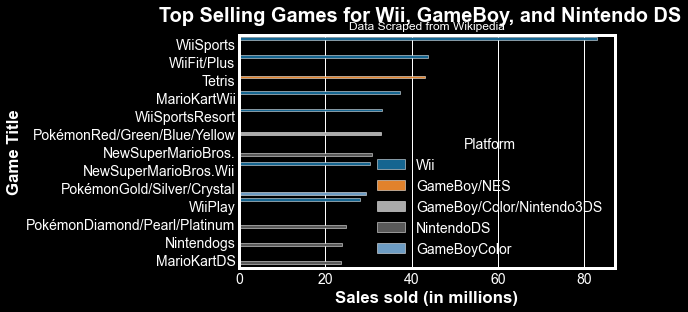

In [362]:
plt.style.use('tableau-colorblind10')
sns.barplot(all_three_consoles['Sales_in_millions'], all_three_consoles['Game'], all_three_consoles['Platform'], edgecolor='white')
plt.suptitle('Top Selling Games for Wii, GameBoy, and Nintendo DS', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Sales sold (in millions)', weight ='bold', color='white')
plt.ylabel('Game Title', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#### Like the previous queries,  the most popular games sold include "Wii", "Mario", and "Pokemon" in their titles. Wii Sports and Wii Fit Plus, both in the Sports genre, are the most popular games sold across platforms. Nintendo's upgrade of technology allowed them to sky rocket sales in 2011 where Wii Sports is double the second-most bestselling game, Wii Fit Plus.

In [364]:
all_nintendo_consoles = pd.read_sql('''SELECT Game, Platform, Sales_in_millions
                                       FROM best_selling_video_games
                                       WHERE Publisher LIKE '%Nintendo%'
                                       GROUP BY Game
                                       ORDER BY Sales_in_millions DESC LIMIT 10 ''', ds_conn)
all_nintendo_consoles

,Game,Platform,Sales_in_millions
0,WiiSports,Wii,82.90
1,SuperMarioBros.,Multi-platform,58.00
2,MarioKart8/Deluxe,WiiU/Switch,56.87
3,WiiFit/Plus,Wii,43.80
4,Tetris,GameBoy/NES,43.00
5,AnimalCrossing:NewHorizons,NintendoSwitch,40.17
6,MarioKartWii,Wii,37.38
7,WiiSportsResort,Wii,33.14
8,PokémonRed/Green/Blue/Yellow,GameBoy/Color/Nintendo3DS,32.88
9,NewSuperMarioBros.,NintendoDS,30.80


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


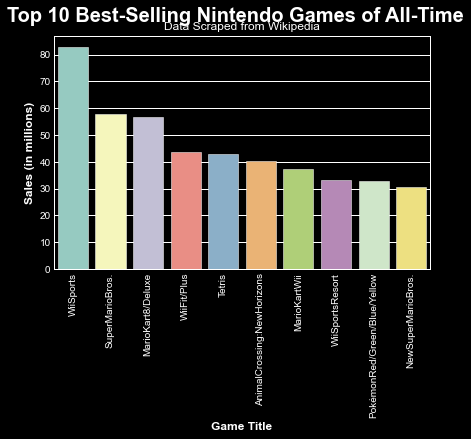

In [369]:
plt.style.use('dark_background')
sns.barplot(all_nintendo_consoles['Game'],all_nintendo_consoles['Sales_in_millions'], edgecolor='white')
plt.suptitle('Top 10 Best-Selling Nintendo Games of All-Time', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Game Title', weight ='bold', color='white')
plt.ylabel('Sales (in millions)', weight ='bold', color='white')
# plt.gca().invert_xaxis()
plt.xticks(color='white', rotation=90)
plt.yticks(color='white')
plt.show()

#### Although Wii and Mario have been Nintendo's bestsellers, Tetris has an amazing amount of sales for a retro classic, with over 40 million copies sold since its inception in the early 198-s. 

In [374]:
all_consoles = pd.read_sql('''SELECT Game, Platform, Sales_in_millions
                               FROM best_selling_video_games
                               ORDER BY Sales_in_millions DESC LIMIT 10 ''', ds_conn)
all_consoles

,Game,Platform,Sales_in_millions
0,Minecraft,Multi-platform,238.00
1,GrandTheftAutoV,Multi-platform,170.00
2,Tetris,Multi-platform,100.00
3,WiiSports,Wii,82.90
4,PUBG:Battlegrounds,Multi-platform,75.00
5,SuperMarioBros.,Multi-platform,58.00
6,MarioKart8/Deluxe,WiiU/Switch,56.87
7,RedDeadRedemption2,Multi-platform,46.00
8,Terraria,Multi-platform,44.50
9,WiiFit/Plus,Wii,43.80


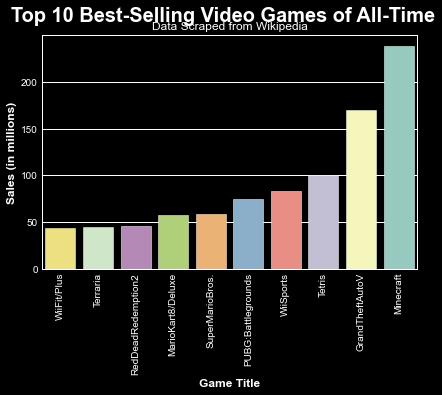

In [375]:
sns.barplot(x='Game', y='Sales_in_millions', data=all_consoles, edgecolor='white')
plt.suptitle('Top 10 Best-Selling Video Games of All-Time', weight ='bold', color = 'white').set_fontsize(20)
plt.title('Data Scraped from Wikipedia').set_fontsize(12)
plt.xlabel('Game Title', weight ='bold', color='white')
plt.ylabel('Sales (in millions)', weight ='bold', color='white')
plt.gca().invert_xaxis()
plt.xticks(color='white', rotation=90)
plt.yticks(color='white')
plt.show()

#### Due to multi-platform games, this allows publishers to reach more audiences which creates more sales. When we expand to non-Nintendo games, Minecraft, Grand Theft Auto V, and Tetris lead the list with over 100 million copies sold each. However, these may have been the gateway for games like Fortnite to become a hit, with now 250-350 million active users worldwide

# Conclusion

#### Nintendo cannot be overlooked as a catalyst in the video game industry. There is big money to continue to be made as the evolution of technology continues with more processing power in CPUs and GPUs, virtual reality in the metaverse, and AI (which is still at the forefront of its engineering). While Nintendo owns a lucrative market share in this industry they are going to have to keep advancing with in-demand technology to stay as dominant as they are. Established franchises such as Mario and Pokemon offer nostalgia to multi-generational audiences and it remains evident that Nintendo will be a dominant gaming publisher. Competitors will  keep a close eye on Nintendo's new console releases to stay competitive in this space. The Nintendo Switch and 3DS have already catapulted in this market and by the looks of it are slowly creeping up towards the same numbers that the Wii has posted. As new data comes out we will be able to see how popularity between these systems will compare.